In [1]:
import itertools
import os

import numpy as np
import matplotlib.pyplot as plt
from time import strftime

from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

%matplotlib inline

# Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train_all.shape

(50000, 32, 32, 3)

In [8]:
y_train_all.shape

(50000, 1)

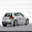

Label index =  1
Label Name =  Car


In [9]:
pic = array_to_img(x_train_all[323])
display(pic)

print('Label index = ',y_train_all[323][0])
print('Label Name = ',LABEL_NAMES[y_train_all[323][0]])

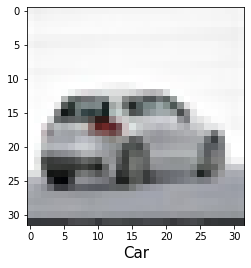

In [10]:
plt.imshow(x_train_all[323])
plt.xlabel(LABEL_NAMES[y_train_all[323][0]], fontsize=15)
plt.show()

Write a for loop to display the first 10 images from the ```x_train_all``` array in a row. Show the name of the label below the picture. Remove the ugly tick marks. *Hint* use matplotlib. 

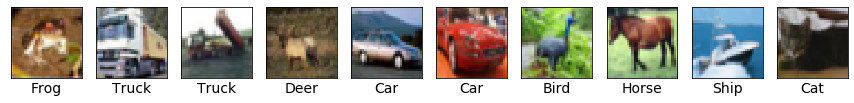

In [11]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [12]:
x_train_all[0].shape

(32, 32, 3)

In [13]:
nr_images, w, h, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {w} \t| height = {h} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [14]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [15]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [16]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [17]:
x_train_all[0][0][0][0]

0.23137254901960785

In [18]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [19]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [20]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from ```x_train_all``` and ```y_train_all``` respectively. 

In [21]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [22]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [23]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [24]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

Create a third model, ```model_3``` that has two dropout layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%. 

In [25]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [28]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

# Tensorboard (visualising learning)

In [29]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

In [30]:
samples_per_batch = 1000

In [31]:
%%time
nr_epochs = 100

model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 17min 55s, sys: 12min 10s, total: 30min 5s
Wall time: 4min 2s


In [32]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 28min 30s, sys: 18min 42s, total: 47min 13s
Wall time: 6min 3s


In [33]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: user 30min 6s, sys: 17min 48s, total: 47min 55s
Wall time: 6min 9s


# Predictions on Individual Images

In [34]:
x_val[0].shape

(3072,)

In [35]:
x_val[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [36]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [37]:
np.set_printoptions(precision=3)

In [38]:
model_2.predict(test)

array([[0.002, 0.001, 0.084, 0.178, 0.299, 0.11 , 0.261, 0.063, 0.   ,
        0.001]], dtype=float32)

In [39]:
model_2.predict(x_val).shape

(10000, 10)

In [40]:
np.argmax(model_2.predict(test), axis=-1)

array([4])

In [41]:
y_val[0]

array([6], dtype=uint8)

Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset. 

In [44]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 4
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 6
Actual value: 1 vs. predicted: 8
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation

In [45]:
model_2.metrics_names

['loss', 'accuracy']

In [46]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 5s 15ms/step - loss: 1.4177 - accuracy: 0.4973
Test loss is 1.42 and test accuracy is 49.7%


### Confusion Matrix

In [47]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [48]:
conf_matrix.shape

(10, 10)

In [49]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [50]:
conf_matrix.max()

663

In [51]:
conf_matrix.min()

6

In [52]:
conf_matrix[0]

array([553,  31,  56,  19,  47,  27,  17,  48, 141,  61])

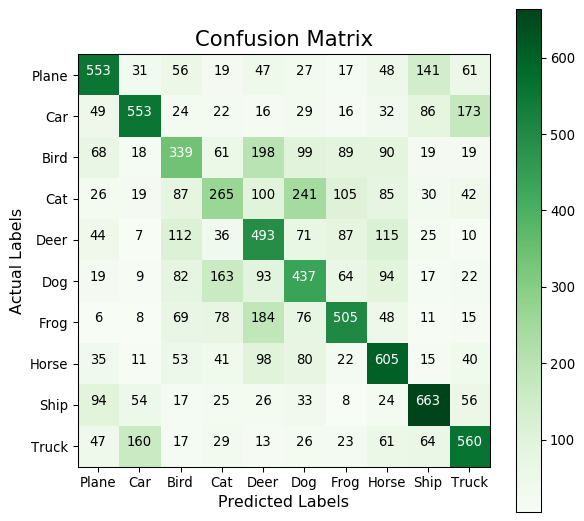

In [53]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives, and the true positives in the confusion matrix.

In [54]:
# True Positives
np.diag(conf_matrix)

array([553, 553, 339, 265, 493, 437, 505, 605, 663, 560])

In [55]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.553, 0.553, 0.339, 0.265, 0.493, 0.437, 0.505, 0.605, 0.663,
       0.56 ])

In [56]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.588, 0.636, 0.396, 0.359, 0.389, 0.391, 0.54 , 0.503, 0.619,
       0.561])

In [57]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 49.73%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole. 

In [58]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 49.80%
Model 2 f score is 49.77%
